# Estructura común en las bases de datos

```
/data
└───train
│   |   gt.txt
│   |   img1_ID.jpg
|   :
│   :
|   |   img2_ID.jpg
|
└───val
│   |   gt.txt
│   |   img1_ID.jpg
|   :
│   :
|   |   imgN_ID.jpg
|
└───test
│   |   gt.txt
│   |   img1_ID.jpg
|   :
│   :
|   |   imgN_ID.jpg
```
Generalmente la estructura se mantiene también para vídeo.

# Tipos de formato para visión por computador
Por lo general, las bases de datos para visión vienen en forma de imágenes separadas, incluyendo tareas asociadas a contenido de video, como es el seguimiento. 
Existen dos formatos principales **png**(Portable Network Graphics) y **jpg**(Joint Photographic Group). La diferencia principal reside en enfoque de compresión miestras que **png** realiza compresión sin perdidas **jpg** no lo hace. 


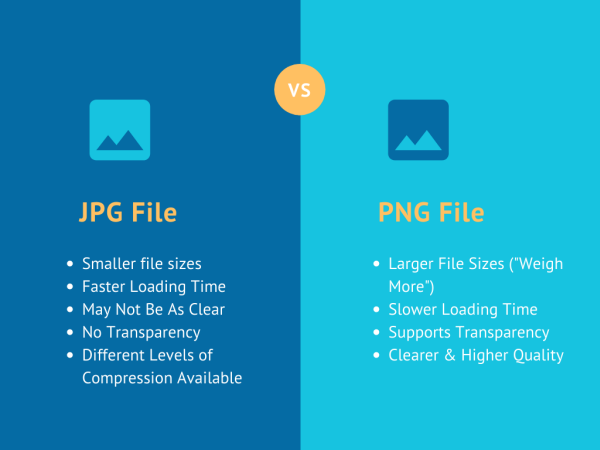

### Recomendaciones 

*  **png** le puede ayudar a capturas más detalles en sus imágenes, pero tenga en cuenta que va a necesitar más almacenamiento. 

* No tiene mucho sentido pasar de **jpg** a **png**, a menos que tenga el necesidades con la parte numérica.

### Ejemplo Ilustrativo

Se quiere sacar la region conectada de una imagen máscara de semillas para contar cuantas semillas hay

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Img = cv2.imread("2021-03-14_08:18:18.png")
cv2.imwrite("PNG_MASK.png", Img)
cv2.imwrite("JPG_MASK.png", Img);

Se lee la imagen en formato png

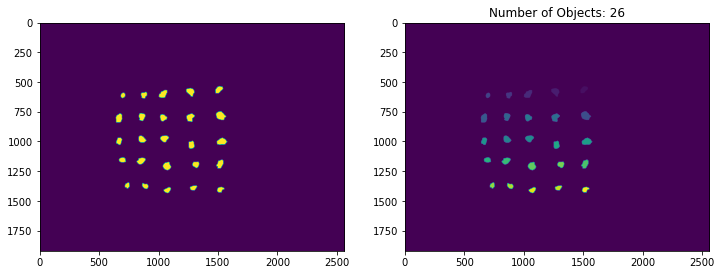

In [ ]:
if __name__ == "__main__":
    Img = cv2.imread("PNG_MASK.png")

    X = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

    n_objects, X_objects = cv2.connectedComponents(X)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(X)
    ax[1].imshow(X_objects)
    ax[1].set_title(f"Number of Objects: {n_objects}")

Ahora se hace lo mismo esta vez con una imagen en formato jpg

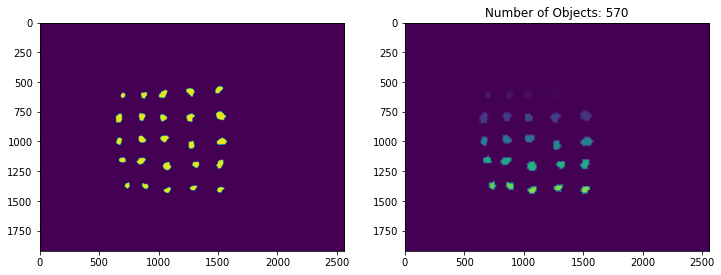

In [ ]:
if __name__ == "__main__":
    Img = cv2.imread("JPG_MASK.jpg")

    X = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

    n_objects, X_objects = cv2.connectedComponents(X)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(X)
    ax[1].imshow(X_objects)
    ax[1].set_title(f"Number of Objects: {n_objects}")

# BASES DE DATOS 


## [MOT Challenge]() 
MOT challenge es una competencia enfocada a seguimiento de múltiples objetos, especificamente peatones. MOT challenge, provee los dataset y las formas de evaluación de cada modelo. Generalmente cada una de las versiones de la competencia libera ua base de datos. 

[MOT20](https://motchallenge.net/data/MOT20/)

### Estructura de los datos 
```
/MOT20
└───train
|   └─── MOT20-1
|   |    |    gt.txt
│   |    └─── img1 
|   |          | 000001.jpg
:   :          :
|   |          | 00000N.jpg
│   └─── MOT20-2
|   └─── MOT20-3
|   └─── MOT20-5
└───test
|   └─── MOT20-4
|   |    |    gt.txt
│   |    └─── img1 
|   |          | 000001.jpg
:   :          :
|   |          | 00000N.jpg
│   └─── MOT20-6
|   └─── MOT20-7
|   └─── MOT20-8
```

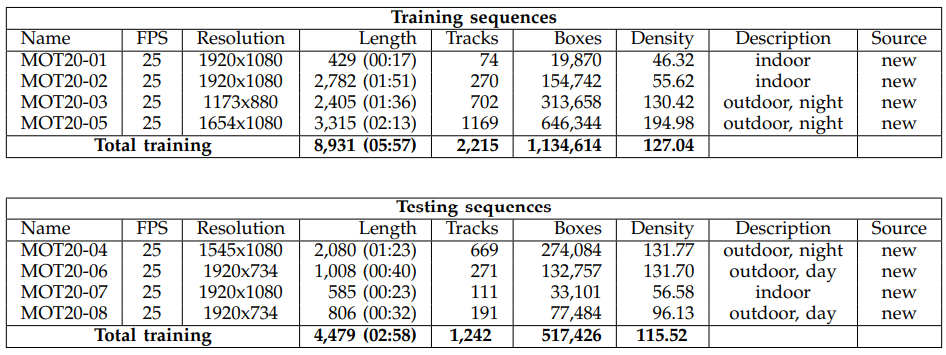

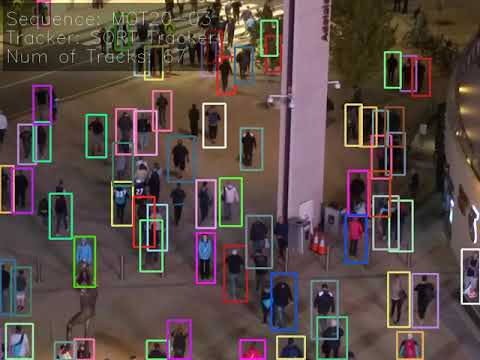

In [ ]:
# @title MOT20-03.
from IPython.display import YouTubeVideo
YouTubeVideo('86CaxN1QV3k')

### Formato de las anotaciones (gt.txt)

```
1, 1, 794.2, 47.5, 71.2, 174.8, 1, 1, 0.8
1, 2, 164.1, 19.6, 66.5, 163.2, 1, 1, 0.5
2, 2, 164.1, 19.6, 66.5, 163.2, 1, 1, 0.5
2, 4, 781.7, 25.1, 69.2, 170.2, 1, 12, 1.
```



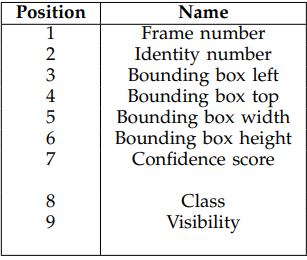

## [COCO: Common Objects in Context]()

COCO es una base de datos para modelos que bajo tareas de detección, segmentación entre otras. Se considera como una de las bases más robustas por su alta variabilidad de categorias y su balanceo de datos. Modelos como YOLO han sido entrenas bajo esta base de datos. 

Características 

* 80 categorias
* Segmentación de objetos 
* Detección de objetos 
* 330 000 imáges etiquetadas 
* 1.5 millones de instancias 


### Estructura de los datos

```
/COCO17
└───train
|   |   000000000ID1.jpg
:   :  
|   |   000000000IDN.jpg
└───val
|   |   000000000ID1.jpg
:   :  
|   |   000000000IDN.jpg
└───test
|   |   000000000ID1.jpg
:   :  
|   |   000000000IDN.jpg
└───annotations
|   |   instances_train2017.json
|   |   instances_val2017.json
```
Especificamene la base de datos 2017 cuenta con el siguiente número de archivos: 
* Entrenamiento: 118293
* Validación:    5006
* Test:          40676

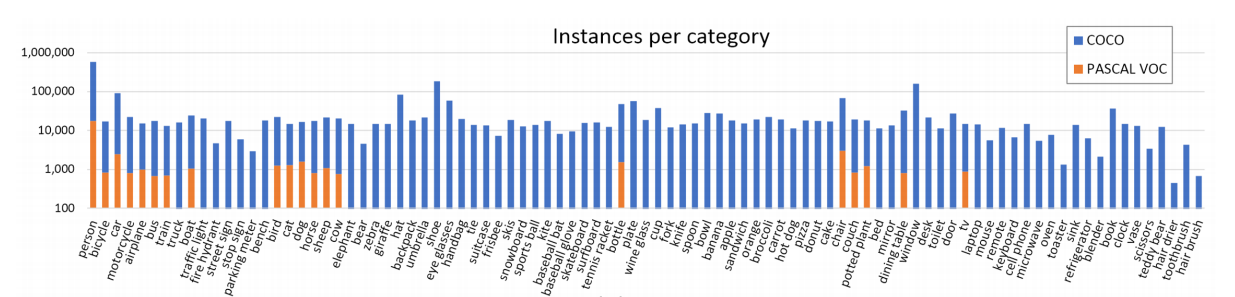

### Formato de las anotaciones 

Las anotaciones vienen en formato **json**  y por lo general tiene las siguientes secciones “info”, “licenses”, “images”, “annotations”, “categories”,




```
{
    "info": {...},
    "licenses": [...],
    "images": [...],
    "annotations": [...],
    "categories": [...], 
}
```

#### "info"


```
"info": {
    "description": "COCO 2017 Dataset",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2017,
    "contributor": "COCO Consortium",
    "date_created": "2017/09/01"
}
```

#### "licenses"



```
"licenses": [
    {
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License"
    },
    {
        "url": "http://creativecommons.org/licenses/by-nc/2.0/",
        "id": 2,
        "name": "Attribution-NonCommercial License"
    },
    ...
]
```







#### "images"

```
"images": [
    {
        "license": 4,
        "file_name": "000000397133.jpg",
        "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
        "height": 427,
        "width": 640,
        "date_captured": "2013-11-14 17:02:52",
        "flickr_url": "http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg",
        "id": 397133
    },
    {
        "license": 1,
        "file_name": "000000037777.jpg",
        "coco_url": "http://images.cocodataset.org/val2017/000000037777.jpg",
        "height": 230,
        "width": 352,
        "date_captured": "2013-11-14 20:55:31",
        "flickr_url": "http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg",
        "id": 37777
    },
    ...
]
```



#### "annotations"


```

"annotations": [
    {
        "segmentation": [[510.66,423.01,511.72,420.03,...,510.45,423.01]],
        "area": 702.1057499999998,
        "iscrowd": 0,
        "image_id": 289343,
        "bbox": [473.07,395.93,38.65,28.67],
        "category_id": 18,
        "id": 1768
    },
    ...
    {
        "segmentation": {
            "counts": [179,27,392,41,…,55,20],
            "size": [426,640]
        },
        "area": 220834,
        "iscrowd": 1,
        "image_id": 250282,
        "bbox": [0,34,639,388],
        "category_id": 1,
        "id": 900100250282
    }
]
```



#### "categories"

```
"categories": [
    {"supercategory": "person","id": 1,"name": "person"},
    {"supercategory": "vehicle","id": 2,"name": "bicycle"},
    {"supercategory": "vehicle","id": 3,"name": "car"},
    {"supercategory": "vehicle","id": 4,"name": "motorcycle"},
    {"supercategory": "vehicle","id": 5,"name": "airplane"},
    ...
    {"supercategory": "indoor","id": 89,"name": "hair drier"},
    {"supercategory": "indoor","id": 90,"name": "toothbrush"}
]
```



## [Proyecto de Semillas]()
Esta base de datos fue creada con el fin de probar modelos de segmentación sobre semillas de tomate con el uso de una raspberry pi

### Estructura de los datos
```
Dataset
└───JPEGImages/
|      |   2021-03-14_12:00:48.jpg
|      |   2021-03-14_13:00:48.jpg
|      :   
|      └   y-m-d_H:M:S.jpg
└───SegmentationClass/
|      |   2021-03-14_12:00:48.png
|      |   2021-03-14_13:00:48.png
|      :   
|      └   y-m-d_H:M:S.png
└───labelmap.txt
```

# Bibliografía Bases de datos 

* [Microsoft COCO: Common Objects in Context](https://arxiv.org/pdf/1405.0312.pdf)

* [MOT20: A benchmark for multi object tracking in
crowded scenes](https://arxiv.org/pdf/2003.09003.pdf)

## Referencias 

* [JPG vs. PNG: Which Should I Use?](https://www.techsmith.com/blog/jpg-vs-png/)

* [JPG vs PNG For Web](https://www.bluearcher.com/blog-item-jpg-vs-png-for-web)

* [Create COCO Annotations From Scratch](https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch)

* [Understanding the COCO dataset format](https://www.programmersought.com/article/3947820135/)